abalone 데이터를 가지고 머신러닝 분류 작업을 수행

라이브러리 및 CSV 파일 불러오기

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
df = pd.read_csv('C:/dataset/abalone.csv', index_col = 0)

In [2]:
# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

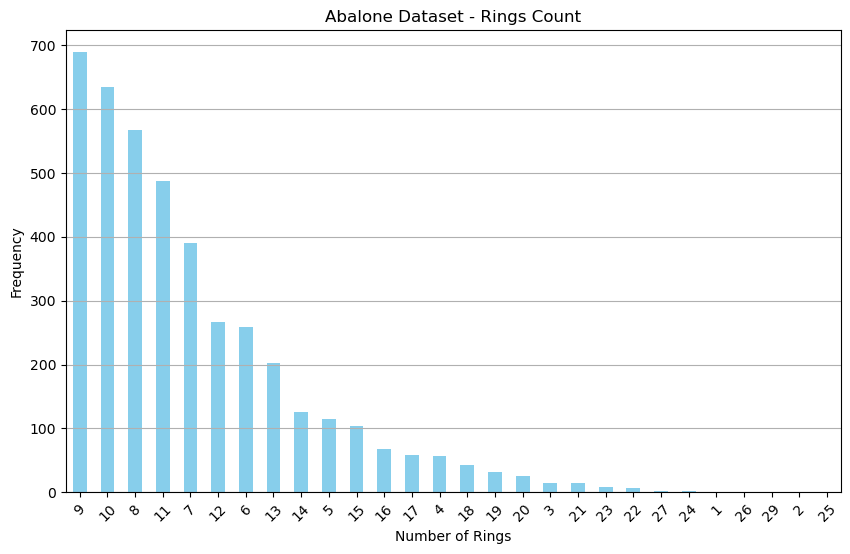

In [4]:
# 'Rings' 컬럼의 레이블 개수 확인
label_counts = df['Rings'].value_counts() 

# 그래프 생성
plt.figure(figsize=(10,6)) # 가로 10, 세로 6의 그림 생성 (없어도 무방)
label_counts.plot(kind='bar', color='skyblue') # label_counts의 막대 그래프 생성, 막대 색상은 하늘색

# 그래프 설정
plt.title('Abalone Dataset - Rings Count')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.xticks(rotation=45) # x축의 눈금 설정 45도 돌려서 표시하겠다는 의미(없어도 무방)
plt.grid(axis='y') # y축을 따라 수평으로 격자선 그리기(없어도 무방)

# 그래프 보여주기
plt.show()

In [5]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
# 결측치 제거 및 다시 확인
df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

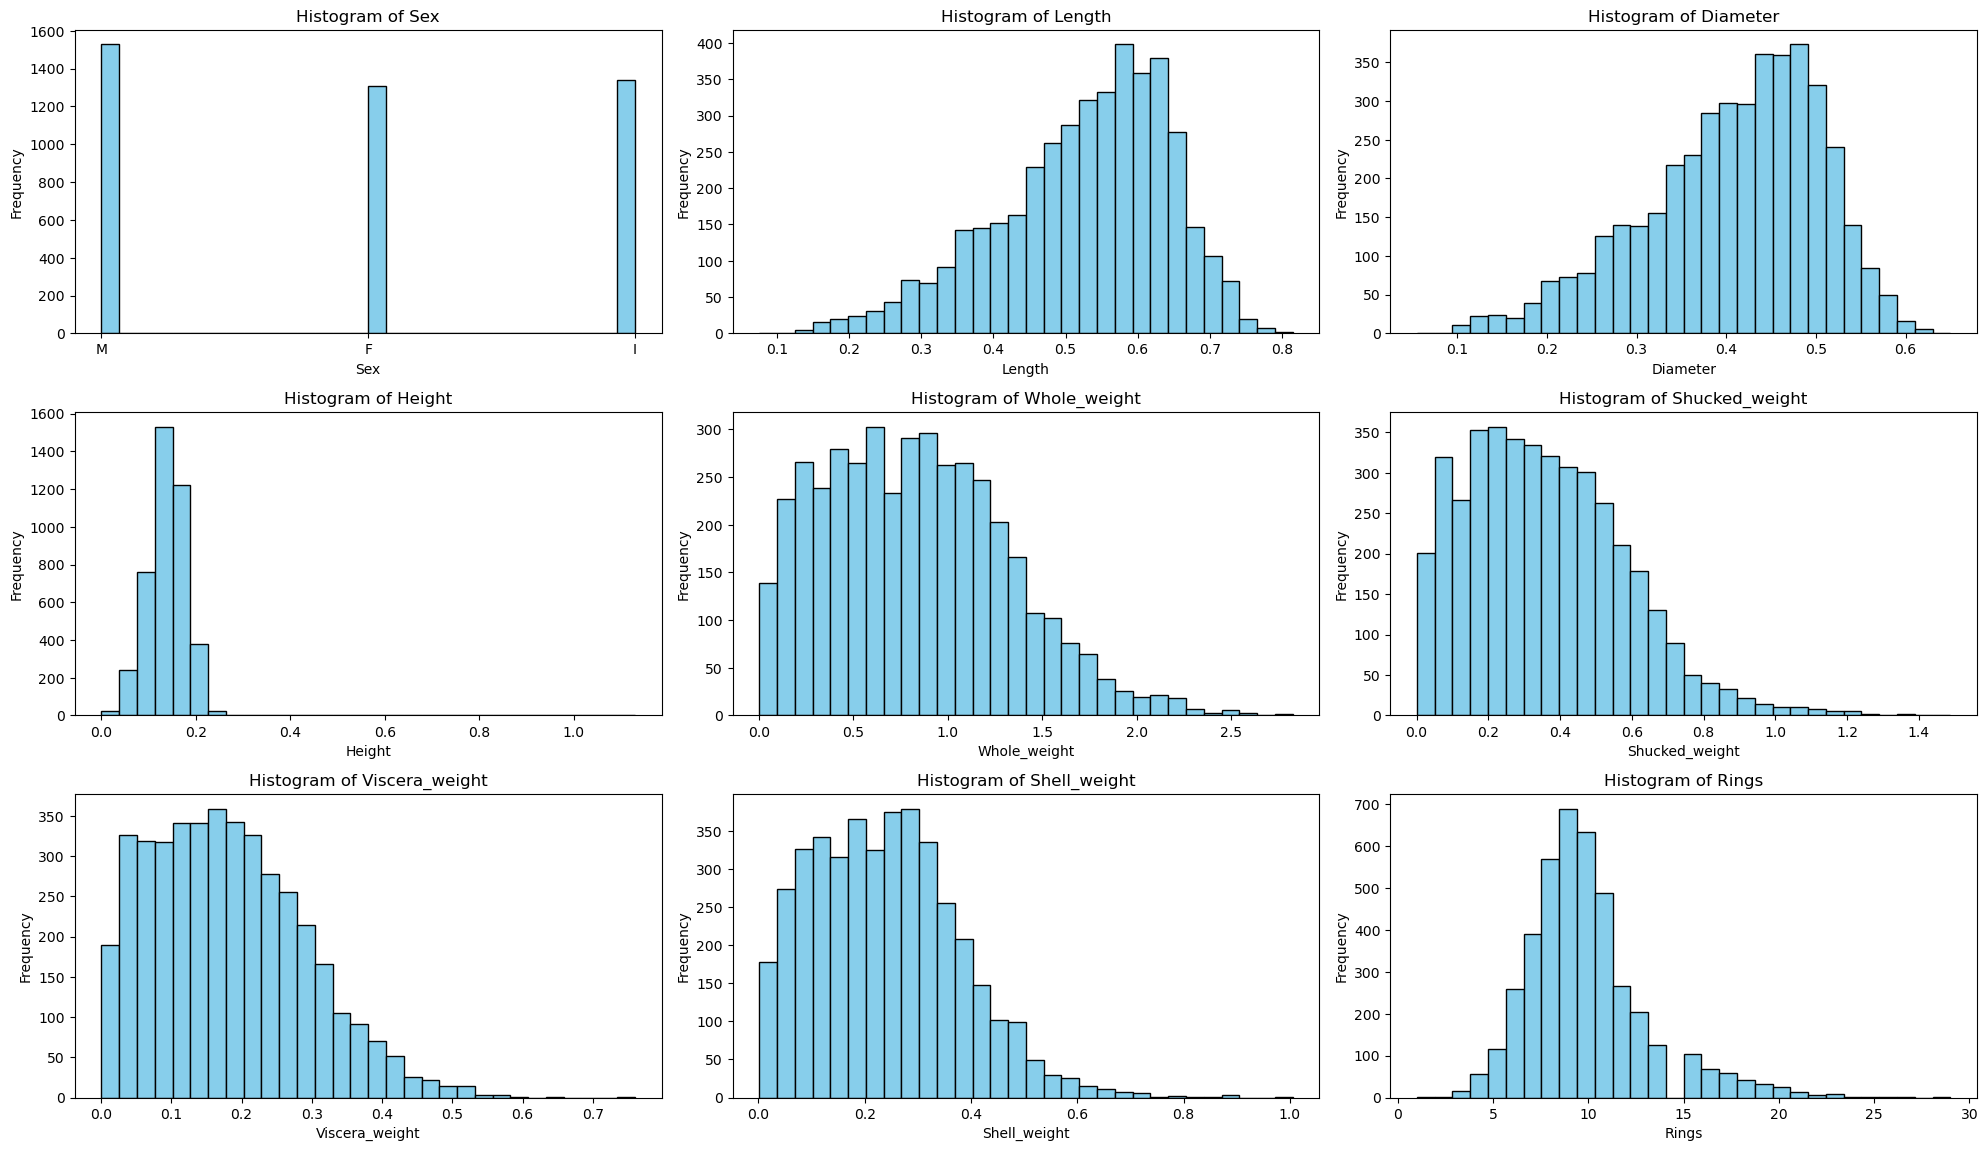

In [7]:
# 칼럼별 히스토그램 확인
# 칼럼별 히스토그램 생성
columns = df.columns

# 플롯 설정
plt.figure(figsize=(20, 15)) # 그래프 사이즈 설정

for i, column in enumerate(columns): # enumerate() 리스트의 각 칼럼에 대해 인덱스 i와 colume을 반복
    plt.subplot(len(columns)//3 + 1, 3, i + 1)  # 3개씩 나눠서 행렬 생성
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black') # 해당 칼럼의 히스토그램 그리기
    plt.title(f'Histogram of {column}') 
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

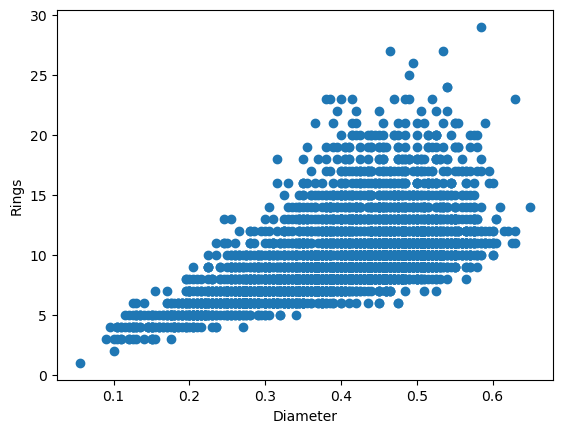

In [8]:
# 산점도 확인
plt.scatter(df['Diameter'], df['Rings'])
plt.xlabel('Diameter')
plt.ylabel('Rings')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


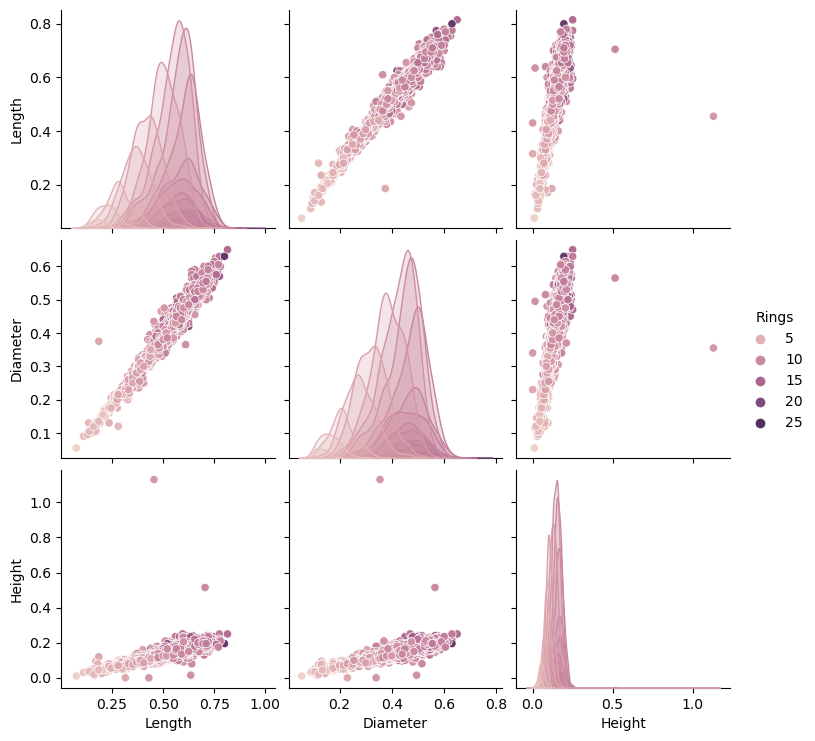

In [9]:
# pairplot 생성
sns.pairplot(df, vars = ['Length', 'Diameter', 'Height'], hue = 'Rings')

plt.show()

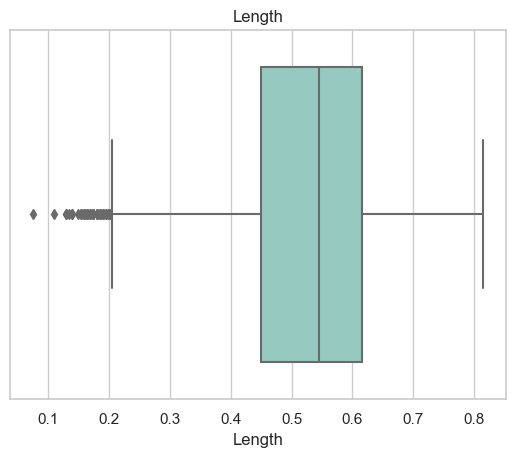

In [10]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Length")
plt.show()

C:\Users\김경환\AppData\Local\Temp\ipykernel_8372\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


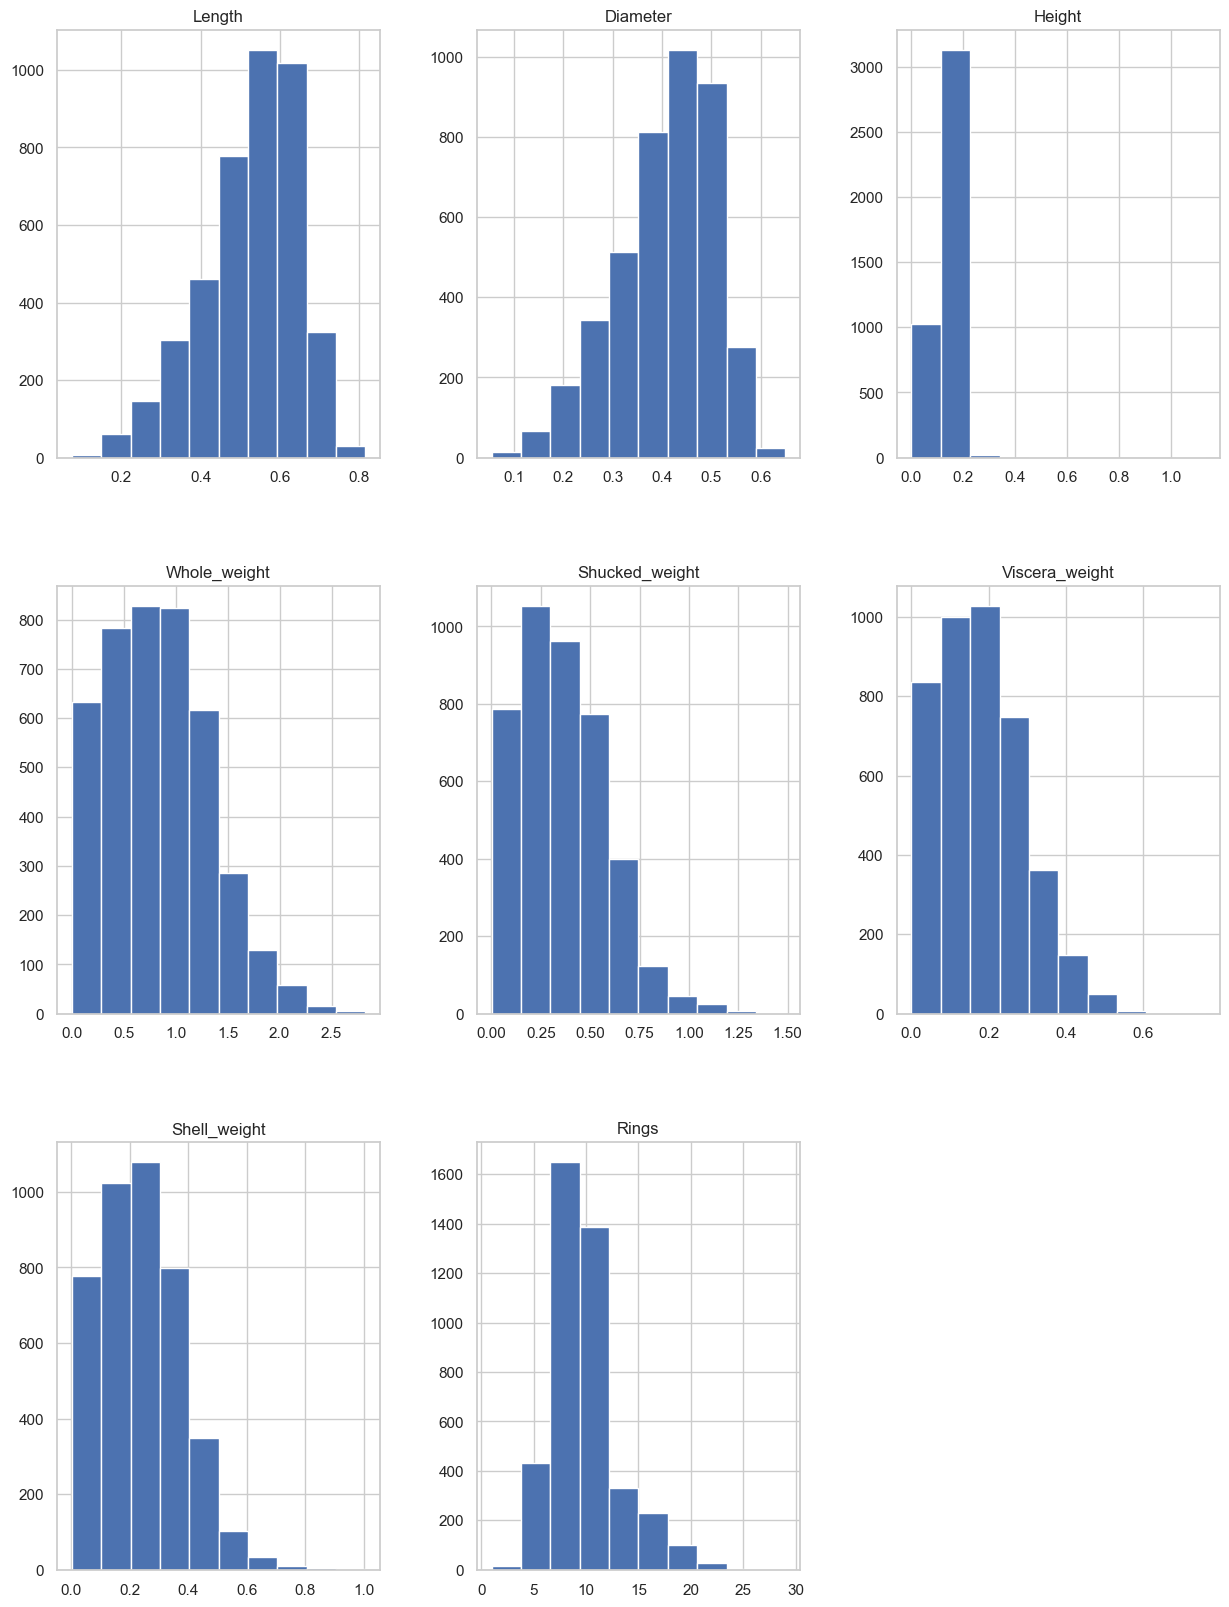

In [11]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [12]:
# 2. 'Rings'를 이진 클래스로 변환 (9 이하 -> 0, 10 이상 -> 1)
df['Rings'] = df['Rings'].apply(lambda x: 0 if x <= 9 else 1)

In [13]:
# 3. 'Sex' 컬럼 레이블 인코딩
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [14]:
# 4. 특징과 타겟 변수 분리
X = df.drop('Rings', axis=1)  # 특성
y = df['Rings']                # 타겟

In [15]:
# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# 6. 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
# 7. # 다항 로지스틱 회귀 모델 생성

model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [88]:
# 8. 예측
y_pred = model.predict(X_test_scaled)

In [112]:
# 9. 평가
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print("훈련 점수: ", train_score)
print("테스트 점수: ", test_score)

훈련 점수:  0.7803320561941252
테스트 점수:  0.7779904306220096


In [113]:
scores = cross_validate(model, X_train_scaled, y_train)
print(scores)

{'fit_time': array([0.02582502, 0.0287466 , 0.03110933, 0.01481056, 0.01811028]), 'score_time': array([0.00068426, 0.        , 0.001086  , 0.        , 0.        ]), 'test_score': array([0.79106858, 0.77511962, 0.7827476 , 0.76837061, 0.76677316])}
